In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd

In [3]:
data=pd.read_csv("HR dataset.csv")

In [4]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,role,salary,role_code,salary code
0,0.38,0.53,2,157,3,0,1,0,sales,low,1,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,1,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1,1


In [5]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'role', 'salary', 'role_code', 'salary code'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 12 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
role                     14999 non-null object
salary                   14999 non-null object
role_code                14999 non-null int64
salary code              14999 non-null int64
dtypes: float64(2), int64(8), object(2)
memory usage: 1.4+ MB


In [8]:
data['role'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: role, dtype: int64

In [9]:
data['role'] = data['role'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 12 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
role                     14999 non-null category
salary                   14999 non-null object
role_code                14999 non-null int64
salary code              14999 non-null int64
dtypes: category(1), float64(2), int64(8), object(1)
memory usage: 1.3+ MB


In [10]:
data['role'] = data['role'].cat.codes


In [11]:
data.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,role,salary,role_code,salary code
0,0.38,0.53,2,157,3,0,1,0,7,low,1,1
1,0.80,0.86,5,262,6,0,1,0,7,medium,1,2
2,0.11,0.88,7,272,4,0,1,0,7,medium,1,2
3,0.72,0.87,5,223,5,0,1,0,7,low,1,1
4,0.37,0.52,2,159,3,0,1,0,7,low,1,1
5,0.41,0.50,2,153,3,0,1,0,7,low,1,1
6,0.10,0.77,6,247,4,0,1,0,7,low,1,1
7,0.92,0.85,5,259,5,0,1,0,7,low,1,1
8,0.89,1.00,5,224,5,0,1,0,7,low,1,1
9,0.42,0.53,2,142,3,0,1,0,7,low,1,1


In [12]:
data.drop(['role','salary'], axis=1 , inplace=True)

In [13]:
# Splitting the data into input features (X), and output target (Y)
X = data.iloc[:, data.columns != "promotion_last_5years"]
Y = data.iloc[:, data.columns == "promotion_last_5years"]

In [17]:
# Splitting the training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=50)

In [20]:
# Decision Tree
# Machine Learning Model
from sklearn.ensemble import RandomForestClassifier
clf=  RandomForestClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

/home/ml/anaconda3/envs/py36/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ml/anaconda3/envs/py36/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [21]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4405
           1       1.00      0.40      0.57        95

   micro avg       0.99      0.99      0.99      4500
   macro avg       0.99      0.70      0.78      4500
weighted avg       0.99      0.99      0.98      4500



In [22]:
matrix = confusion_matrix(y_test, pred)
print(matrix)

[[4405    0]
 [  57   38]]


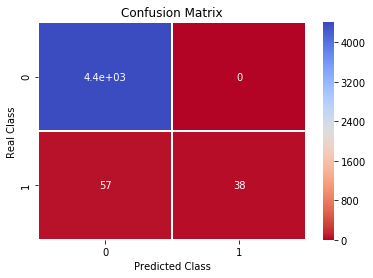

In [23]:
sns.heatmap(matrix, cmap="coolwarm_r", annot=True, linewidths=0.5)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Real Class")
plt.show()

In [24]:
# Calculating the Area Under the Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.7


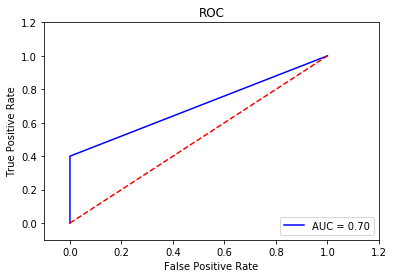

In [25]:
# Plotting the ROC Curve
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [26]:
# Finding the important features from the data
clf = RandomForestClassifier()
clf.fit(X, Y)
important_feat = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(important_feat)

average_montly_hours    0.256961
satisfaction_level      0.205103
last_evaluation         0.199505
role_code               0.103167
time_spend_company      0.087927
number_project          0.075231
salary code             0.034868
Work_accident           0.026132
left                    0.011106
dtype: float64


/home/ml/anaconda3/envs/py36/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ml/anaconda3/envs/py36/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
